# TelcoX Churn Analysis

TelecoX  is  a  national  telecommunication  company  that  is  facing  an  increasing  churning 
problem due to the privatization of the market. 
 
In order to mitigate this issue, the head of the marketing department is aiming to offer a 20% 
discount for customers who are likely to churn. Hence it important to predict accurately the 
propensity of churn of each customer while reducing the number of false positive. 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

plt.style.use('seaborn-v0_8-pastel')

plt.rc('legend',fontsize=20, title_fontsize=20) # using a size in points
# plt.rc(fontsize='medium')

RED = '#F86161'
BLUE = 'lightblue'

## Read Data

- Read train data for EDA. We want to find the most important features for our model.

Variables:

- **Gender**: Whether the customer is a male or a female 
- **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0) 
- **Partner**: Whether the customer has a partner or not (Yes, No) 
- **Dependents**: Whether the customer has dependents or not (Yes, No) 
- **tenure**: Number of months the customer has stayed with the company 
- **PhoneService**: Whether the customer has a phone service or not (Yes, No) 
- **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service) 
- **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No) 
- **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet 
service) 
- **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet 
service) 
- **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet 
service) 
- **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service) 
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)  
- **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No 
internet service) 
- **Contract**: The contract term of the customer (Month-to-month, One year, Two year) 
- **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No) 
- **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank 
transfer (automatic), Credit card (automatic)) 
- **MonthlyCharges**: The amount charged to the customer monthly 
- **TotalCharges**: The total amount charged to the customer 
- **Churn**: Whether the customer churned or not (Yes or No) 

In [2]:
path = '../data/train.csv'
df_orig = pd.read_csv(path)
df = df_orig.copy() # Copy for future manipulations
df_orig.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,11,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,102.00,1145.35,Yes
1,Male,0,Yes,Yes,66,Yes,Yes,DSL,No,No,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),NaN,4189.7,No
2,Male,0,Yes,Yes,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.45,1378.45,No
3,Female,0,Yes,No,31,Yes,No,DSL,Yes,No,No,Yes,No,Yes,One year,Yes,Electronic check,64.00,1910.75,No
4,Male,0,Yes,Yes,62,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,NaN,5215.25,No
5,Male,0,Yes,Yes,32,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95,No
6,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,Yes,No,No,No,No,Two year,Yes,Bank transfer (automatic),54.20,3838.2,No
7,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),NaN,4748.7,No
8,Female,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.6,No
9,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.55,80.55,No


# Exploratory Data Analysis

Before training any model, it is important to explore the content of our data so that we can find interesting patterns that can help us to improve model quality.

## Shape and type of the Data

In [3]:
print("In this dataset we can find {} rows and {} columns".format(*df.shape))

In this dataset we can find 4212 rows and 20 columns


Most of the variables are categorical except `tenure`, `Monthly Charges` and `Total Charges`.

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The type of Total Charges is `object`. Using regular expressions we can check if there is something different from a number or digit. Doing this we can see that there are missing values introduced like whitespaces. Let's substitute them by `np.nan` so that we can cast the column into float type.

In [5]:
df[df['TotalCharges'].apply(lambda x: bool(re.match('\D+', x)))] 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
31,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
176,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
298,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
1736,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2194,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
2895,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
2944,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3230,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),NaN,,No


In [6]:
empty_val = df[df['TotalCharges'].apply(lambda x: bool(re.match('\D+', x)))]['TotalCharges'].unique()[0]
empty_val

' '

In [7]:
df.loc[df['TotalCharges']==empty_val, ['TotalCharges']] = np.nan
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dtypes['TotalCharges']

dtype('float64')

In [8]:
num_data = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_data = [col for col in df.columns if col not in num_data]

print('Numeric Vars:\n',num_data, '\n')
print('Categoric Vars:\n',cat_data)

Numeric Vars:
 ['tenure', 'MonthlyCharges', 'TotalCharges'] 

Categoric Vars:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


## Missing Values

The two only variables with missing values are the Monthly Charges and Total Chrages. The amount of data without these values is enough to not to drop them. Different strategies for data imputation will be explored later on.

In the case of missing values in `Total Charges` they correspond to customers who have 0 months of `tenure`. In these cases, we can fill the Total Charges with the Month Charges. In the case of the one who hasn't paid anything yet, we can fill both values with 0.

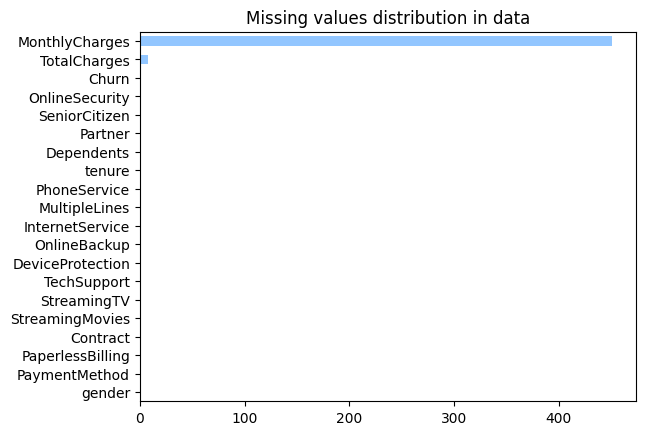

In [9]:
df.isnull().sum().sort_values().plot(kind='barh', title='Missing values distribution in data');


In [10]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
31,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
176,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
298,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
1736,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2194,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
2895,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
2944,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3230,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),NaN,NaN,No


In [11]:
df[df['MonthlyCharges'].isnull()].head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,Yes,Yes,66,Yes,Yes,DSL,No,No,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),NaN,4189.70,No
4,Male,0,Yes,Yes,62,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,NaN,5215.25,No
7,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),NaN,4748.70,No
14,Female,1,No,No,7,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,NaN,574.35,No
24,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,NaN,137.10,No
33,Female,1,Yes,No,66,No,No phone service,DSL,No,Yes,Yes,No,Yes,No,One year,No,Bank transfer (automatic),NaN,3027.25,No
38,Male,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,229.55,Yes
47,Male,0,No,No,33,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,No,Two year,Yes,Electronic check,NaN,3027.65,No
57,Female,0,No,No,23,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),NaN,1758.60,Yes
68,Female,0,Yes,No,7,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),NaN,496.90,Yes


Let's fill the values for `MonthlyCharges` as mentioned before.

In [28]:
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(0)
df.loc[df['TotalCharges'].isnull()&(df['MonthlyCharges']==0), ['TotalCharges']] = 0

## Categoric Data Analysis

In [12]:
df_cat = df.copy()
df_cat = df_cat[cat_data]

First of all, let's display the number of different categories for each of them. We can see that they don't take too many different values so it  is possible to track the influence of each of them in the target.

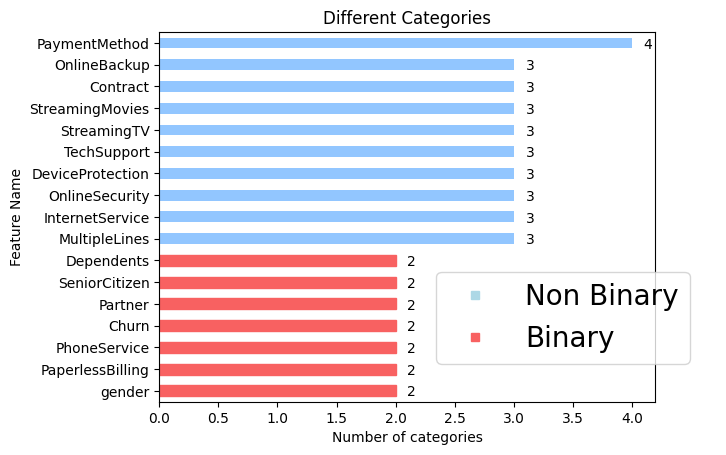

In [13]:
sr_cat_unique = df_cat.apply(lambda x: x.nunique()).sort_values()

fig, ax = plt.subplots()
bars = sr_cat_unique.plot(kind='barh', ax=ax, title='Different Categories')

ax.plot([], [], 's', color=BLUE, fillstyle='full', label='Non Binary')
ax.plot([], [], 's', color=RED, fillstyle='full', label='Binary')

for bar in bars.patches:
    ax.text(bar.get_width() + .1,  bar.get_y(), bar.get_width())
    if bar.get_width() == 2:
        bar.set_color(RED)

ax.set_xlabel('Number of categories')
ax.set_ylabel('Feature Name')
fig.legend(loc=(0.6, 0.2))


### Binary Variables


In this subsection we can see that the **gender of the person or if they have hired a Phone Service or not doesn't influence the churn**, or at least, not in a direct way. 

However, we can see that having dependents, being senior, having a partner and having paperless billing or not, have a  significative effect on churn.

Risk of churn factors:

- Not having paper billing (related to young people)
- Not having a Partner
- Not being Senior
- Not having Dependents


In [14]:
cols_binary = list(sr_cat_unique[sr_cat_unique == 2].index)
df_binary = df.copy()
df_binary = df_binary[cols_binary]

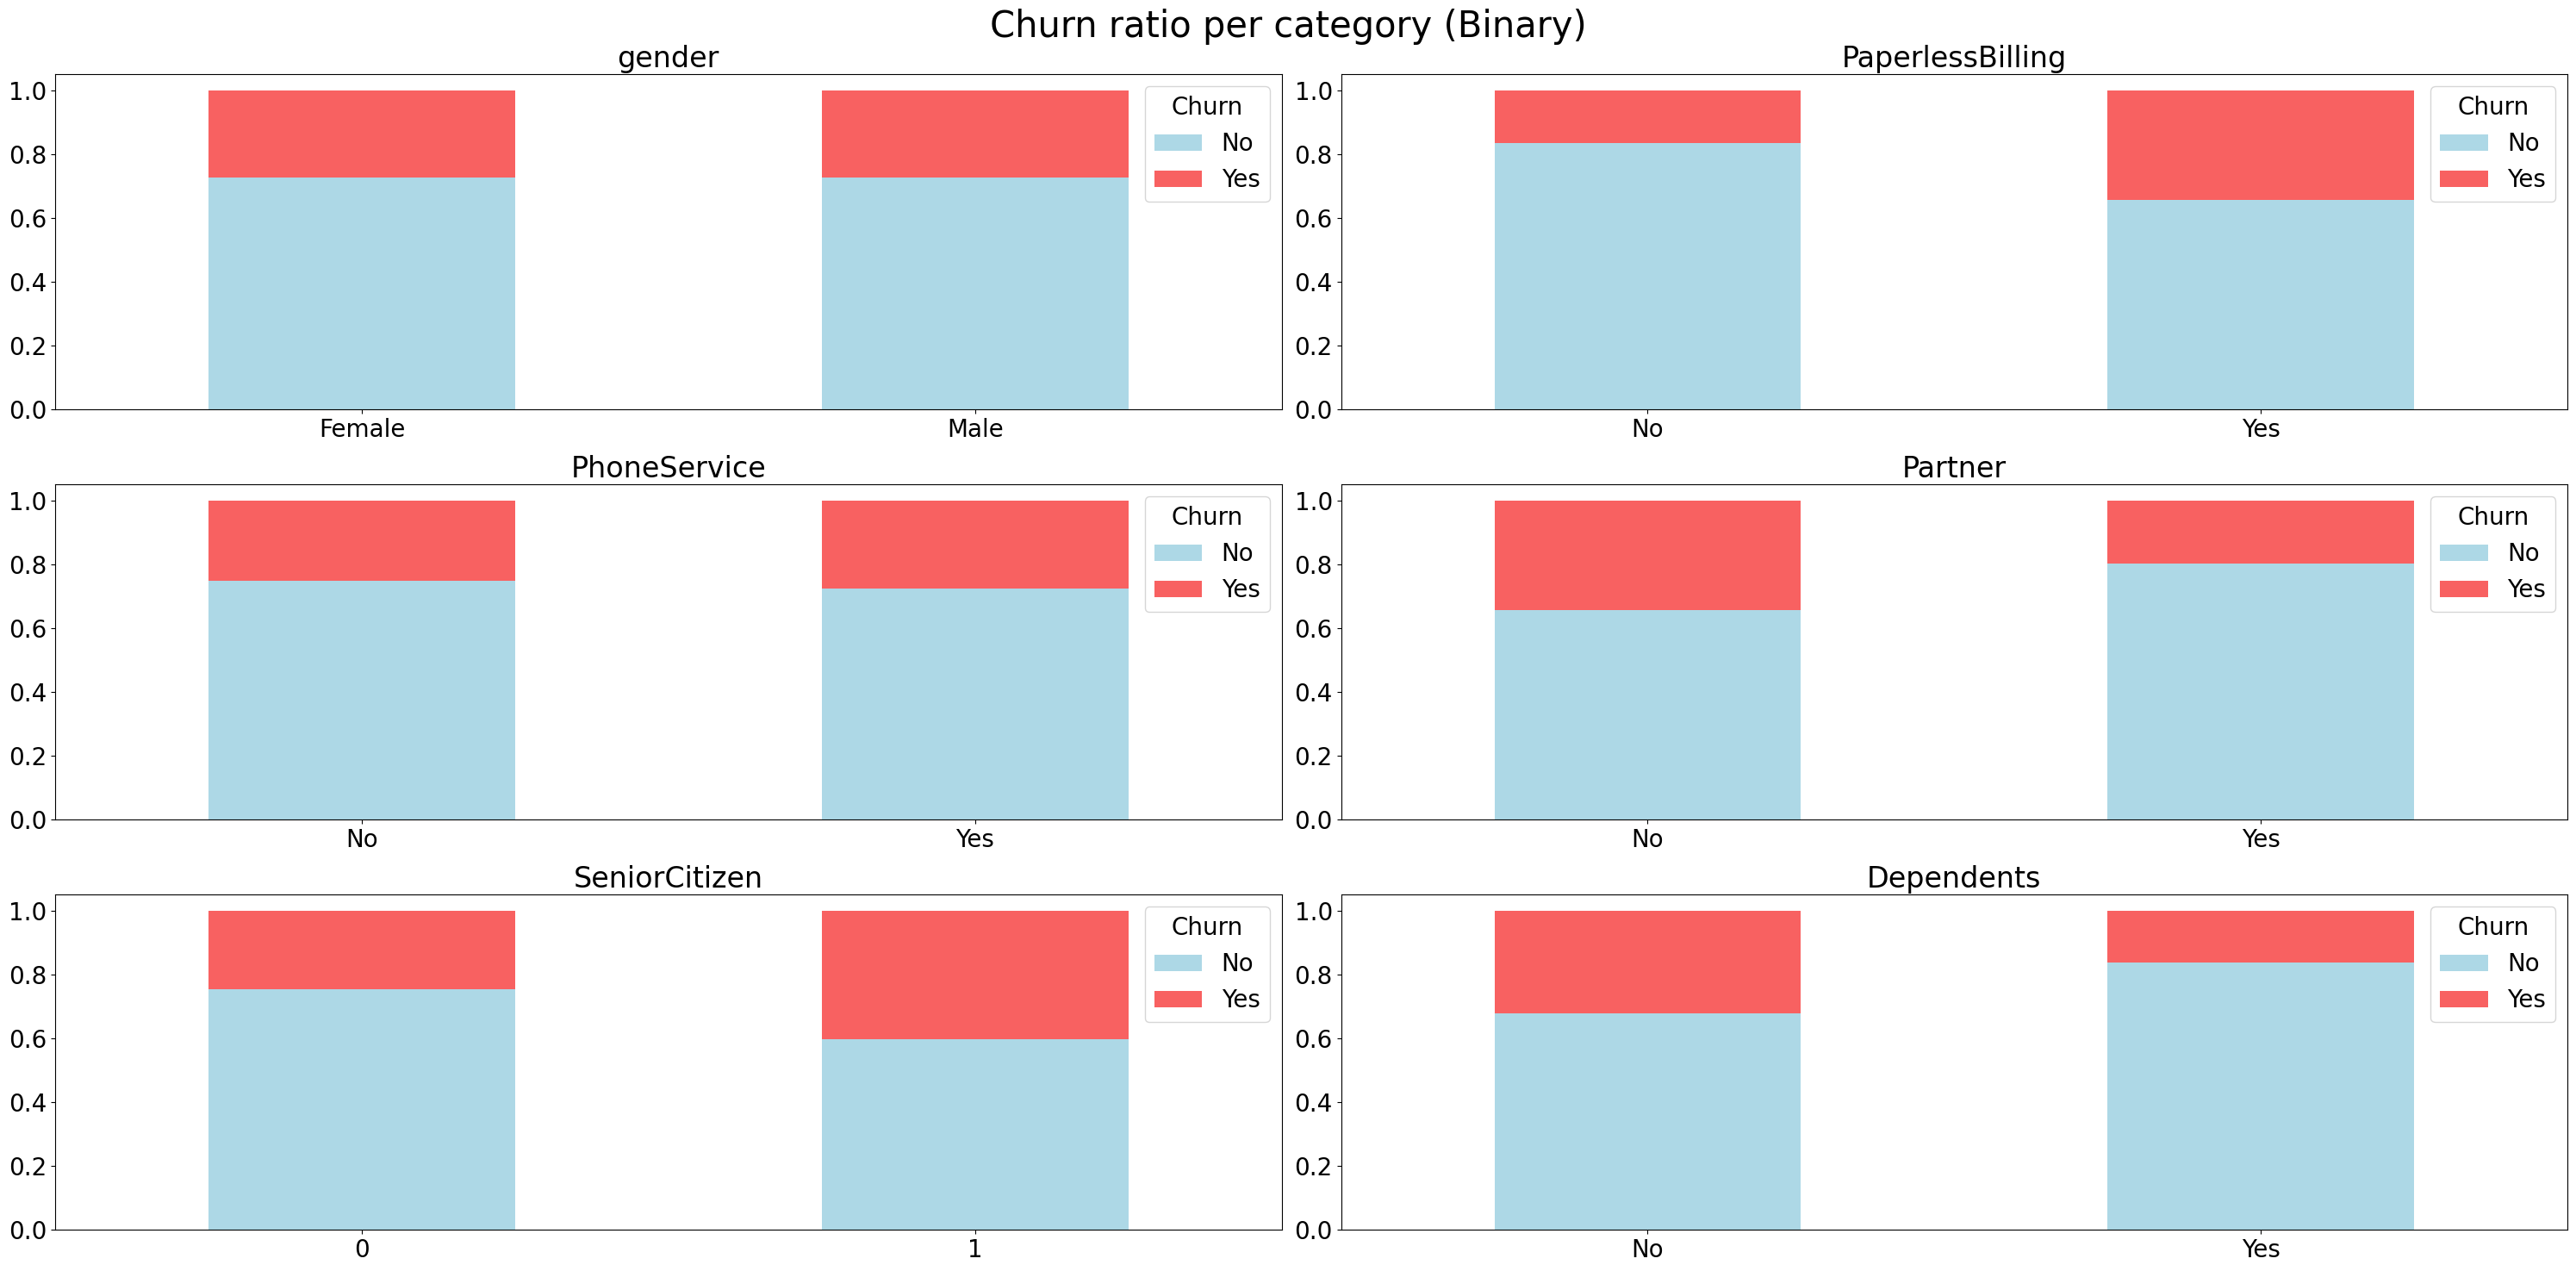

In [15]:
cols_binary = [x for x in cols_binary if 'Churn' != x]
fig, ax = plt.subplots(len(cols_binary) // 2, 2, figsize=(30, 15))
ax = ax.reshape(-1)
for i, col in enumerate(cols_binary):
    df_binary_prop = df_binary.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    df_binary_prop.plot(kind='bar', stacked=True, ax=ax[i], title=col, color=[BLUE, RED])
    
    ax[i].set_xlabel('')
    ax[i].set_title(col, fontsize=24)
    ax[i].tick_params(axis='both', labelsize=20, rotation=0)

# fig.subplots_adjust()
fig.suptitle("Churn ratio per category (Binary)", fontsize=30)
fig.tight_layout()

At first glance, it is possible to observe that `gender` and `PhoneService`, when treated individually, aren't decisive in Churn predictions.

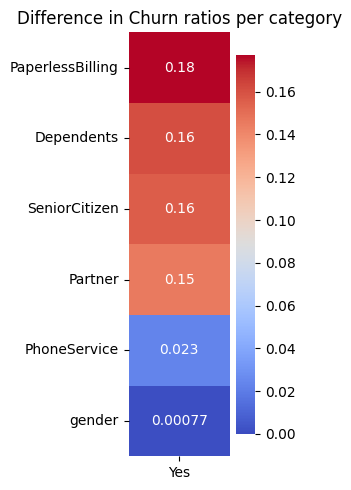

In [29]:
df_churn = df_binary.melt(value_vars=cols_binary, id_vars='Churn').\
                    groupby(['variable', 'value'])['Churn'].\
                    value_counts(normalize=True).\
                    unstack(level=2).\
                    reset_index()

dff = pd.DataFrame(df_churn.groupby('variable')['Yes'].diff().dropna().abs())
dff.index = df_churn['variable'].unique()

fig, ax = plt.subplots(figsize=(3, 5))
sns.heatmap(dff.sort_values(by='Yes', ascending=False), vmin=0, ax=ax, annot=True, cmap='coolwarm')
ax.set_title('Difference in Churn ratios per category')
fig.tight_layout();

In [17]:
df_bin_dummy = pd.get_dummies(df_binary, drop_first=True)
df_bin_dummy.columns=[re.sub('_.*$', '', col) for col in df_bin_dummy]
df_bin_dummy

,SeniorCitizen,gender,PaperlessBilling,PhoneService,Churn,Partner,Dependents
0,0,0,1,1,1,1,0
1,0,1,1,1,0,1,1
2,0,1,0,1,0,1,1
3,0,0,1,1,0,1,0
4,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...
4207,0,0,0,1,0,1,1
4208,0,0,1,1,0,0,0
4209,0,1,1,1,0,0,0
4210,0,0,1,1,1,0,0


In [18]:
def cramersv(df, x, y):
    
    # Finding Chi-squared test statistic,
    # sample size, and minimum of rows
    # and columns
    dataset = df_binary[[x, y]].copy()
    dataset = dataset.groupby([x, y]).size().unstack()
    X2 = stats.chi2_contingency(dataset, correction=False)[0]
    N = np.sum(dataset.values)
    minimum_dimension = min(dataset.shape)-1
    
    # Calculate Cramer's V
    result = np.sqrt((X2/N) / minimum_dimension)
    
    # Print the result
    return result

In [19]:
d_cramer = {}
for col in cols_binary:
    d_cramer[col] = [cramersv(df_bin_dummy, 'Churn', col)]

pd.DataFrame.from_dict(d_cramer)

,gender,PaperlessBilling,PhoneService,Partner,SeniorCitizen,Dependents
0,0.000866,0.195092,0.015068,0.163311,0.130071,0.166864


### Non Binary Variables

In this case, we can easily see in the plots that 3 important factors in churn are the following:

- Having Fiber Optic as Internet Service
- Not having Online Security, Device Protection or Tech Support
- Having Month-to-month contracts instead  of 1year or 2year
- Using Electroonic Check as Payment Method


In [20]:
cols_non_binary = list(sr_cat_unique[sr_cat_unique > 2].index)
df_non_binary = df.copy()
df_non_binary = df_non_binary[cols_non_binary + ['Churn']]

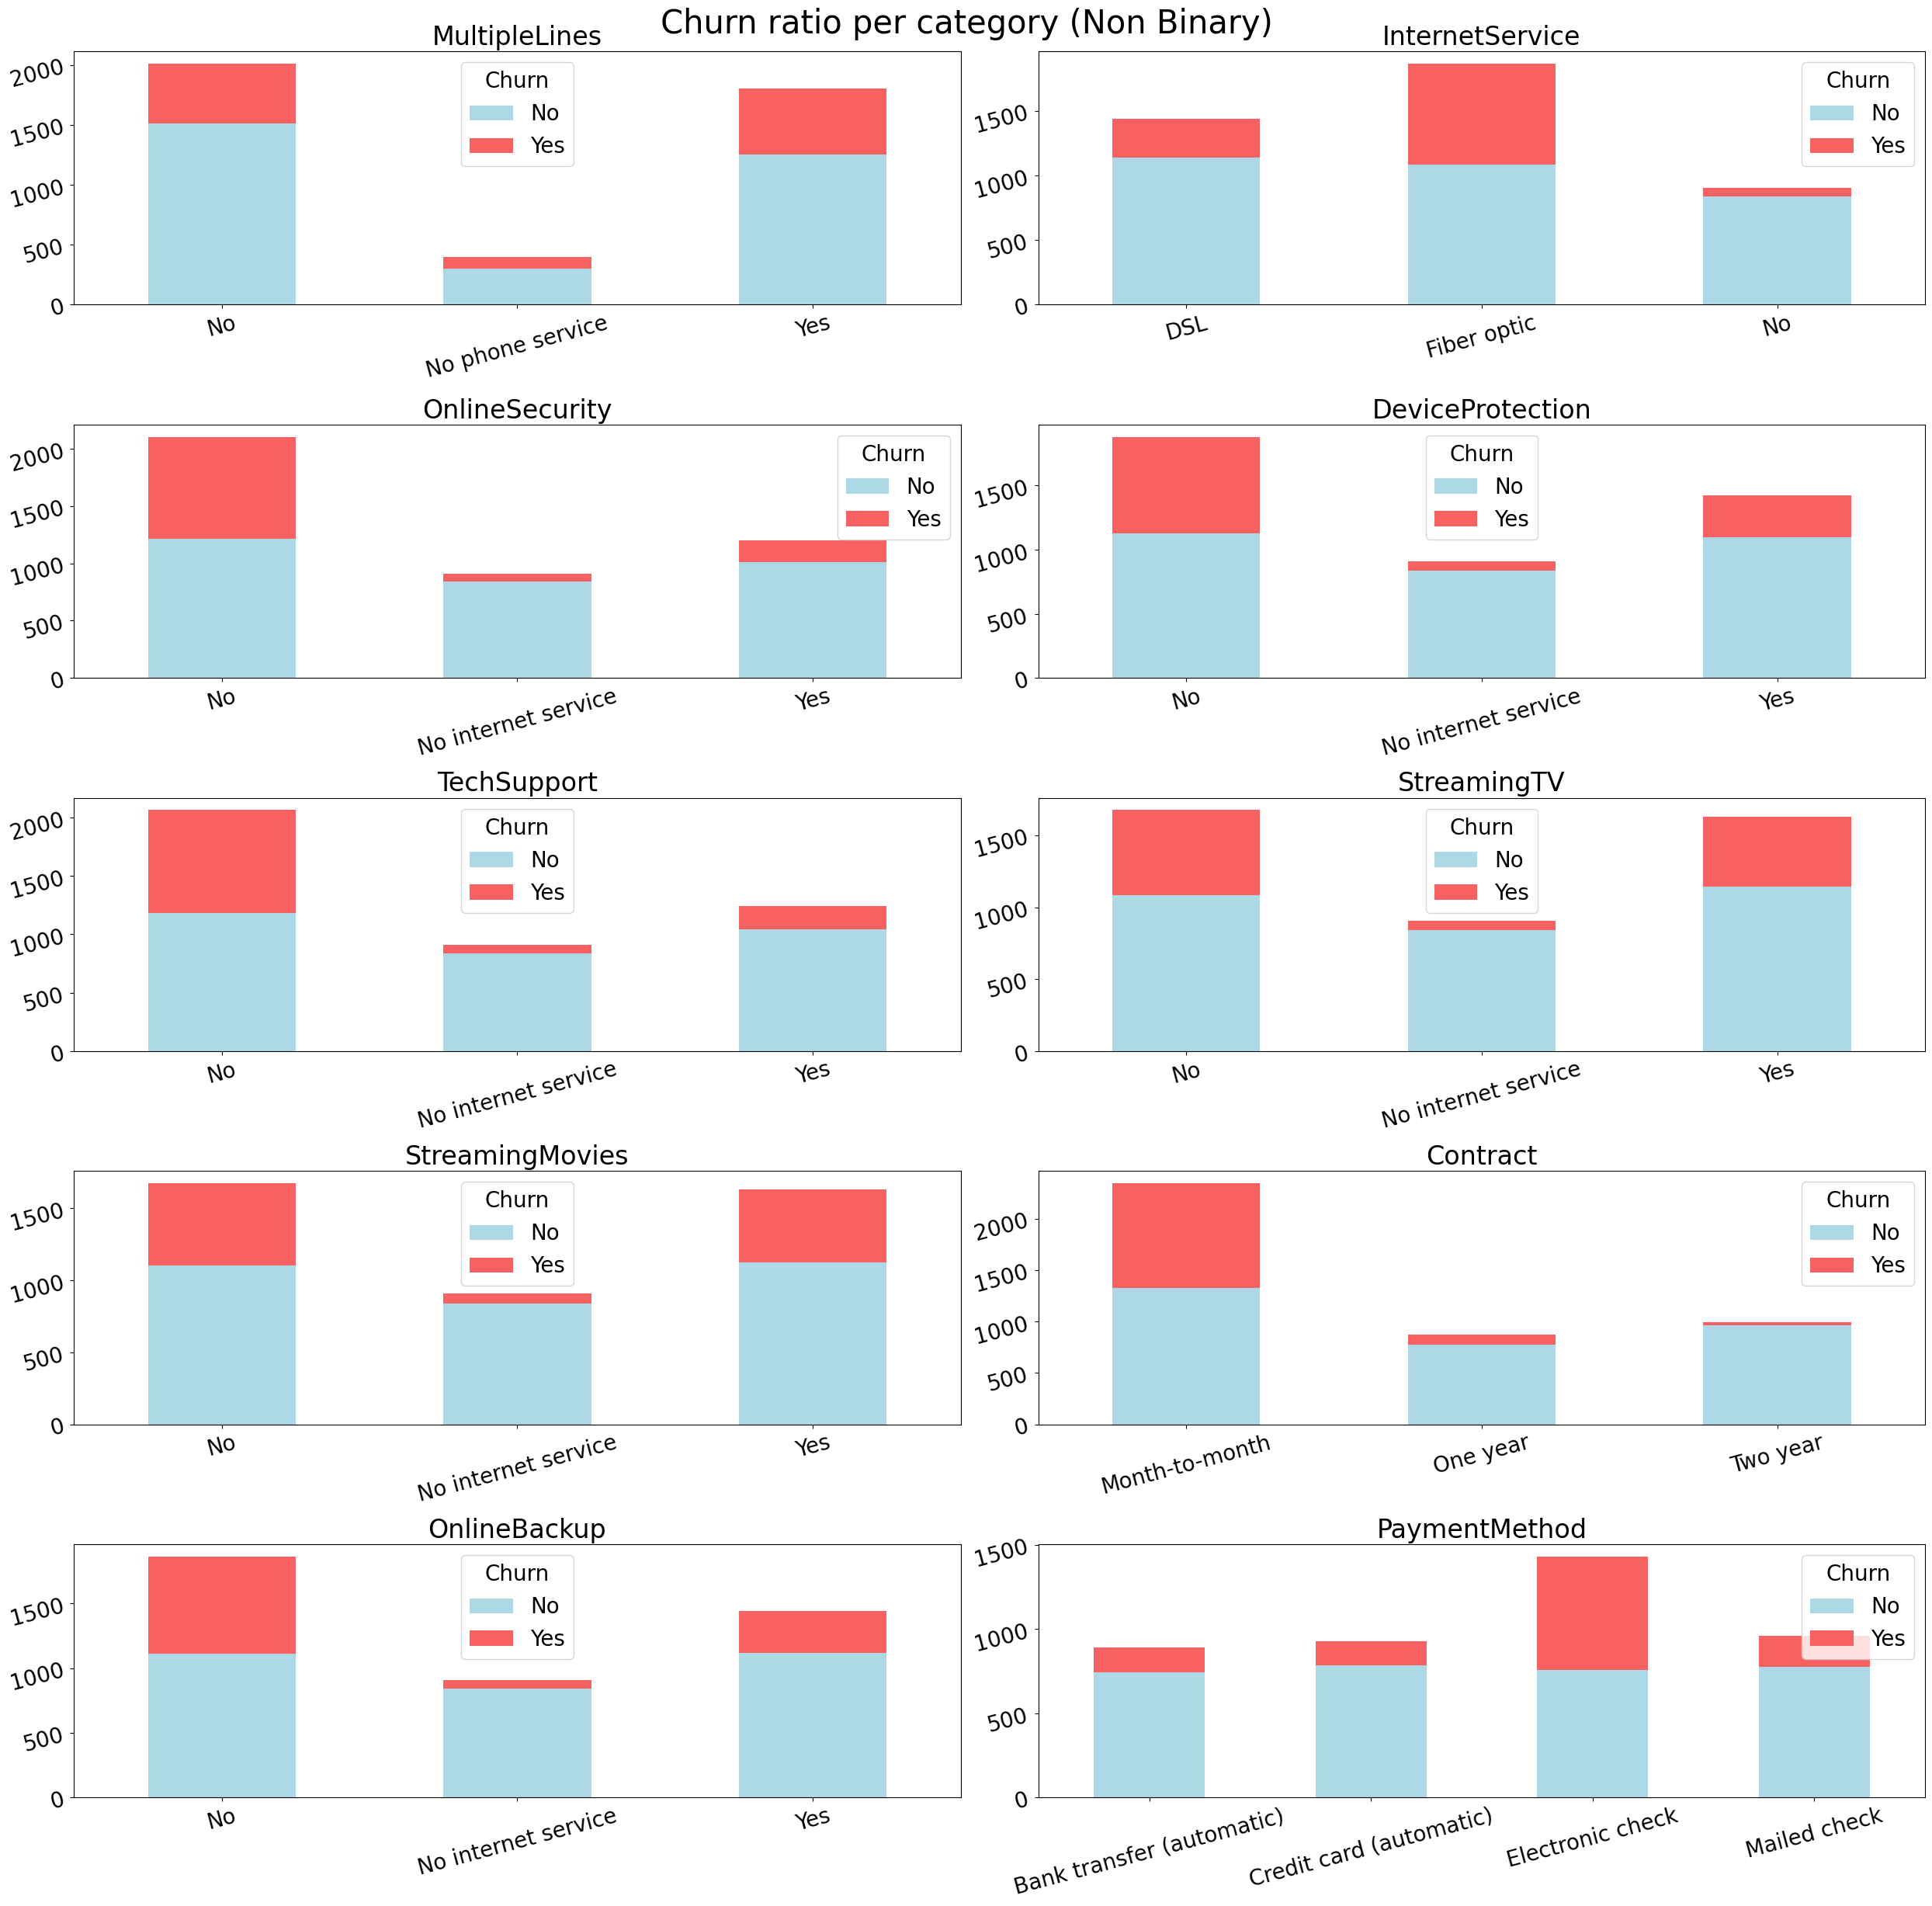

In [21]:
cols_non_binary_ = [x for x in cols_non_binary if 'Churn' != x]
fig, ax = plt.subplots(len(cols_non_binary_) // 2 , 2, figsize=(25, 25))
ax = ax.reshape(-1)
for i, col in enumerate(cols_non_binary_):
    df_non_binary_prop = df_non_binary.groupby(col)['Churn'].value_counts(normalize=False).unstack()
    df_non_binary_prop.plot(kind='bar', stacked=True, ax=ax[i], title=col, color=[BLUE, RED])
    
    ax[i].set_xlabel('')
    ax[i].set_title(col, fontsize=24)
    ax[i].tick_params(axis='both', labelsize=20, rotation=15)

# fig.subplots_adjust()
fig.suptitle("Churn ratio per category (Non Binary)", fontsize=30)
fig.tight_layout()

## Numeric Data Analyisis

The remaininng variables to analyze are the numeric ones. In this case, they make reference to the Charges and the tenure. There is a close relationship between the Total Charge and the tenure. The longer a customer stays in the company, the more they spend on it.

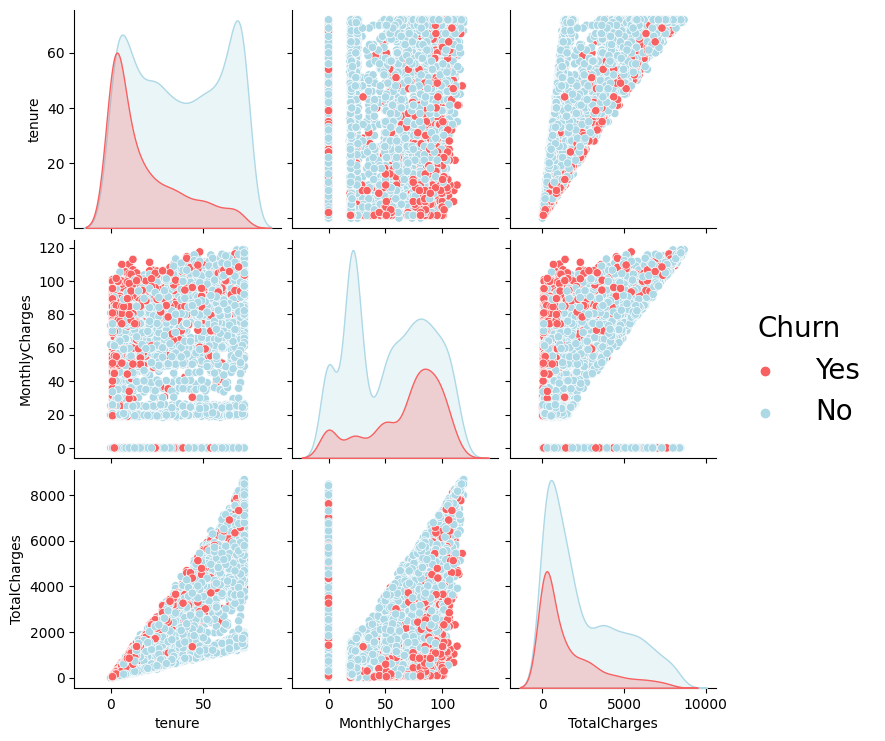

In [31]:
df_num = df[num_data + ['Churn']].copy()
sns.pairplot(df_num, hue='Churn', palette={'Yes':RED, 'No':BLUE});

As we can see in the plot above, there are three conclussions we can obtain about churning people:

- They don't stay for a long time in the company in comparison to the rest.
- They spend considerably more in a monthly basis, probably because they don't pay in a year or 2-years base.
- As they don't stay for a long time, even when they spend more money monthly, their total charges are not very high. 

C:\Users\alber\AppData\Local\Temp\ipykernel_43556\4131571657.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_num.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)


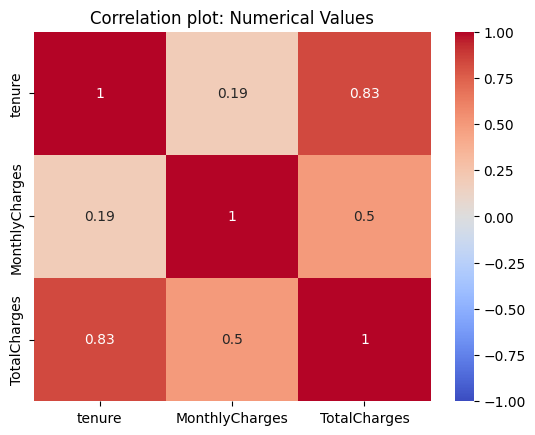

In [40]:
sns.heatmap(df_num.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation plot: Numerical Values');

C:\Users\alber\AppData\Local\Temp\ipykernel_43556\2084557058.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.concat([df_num, df_bin_dummy['Churn']], axis=1).corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)


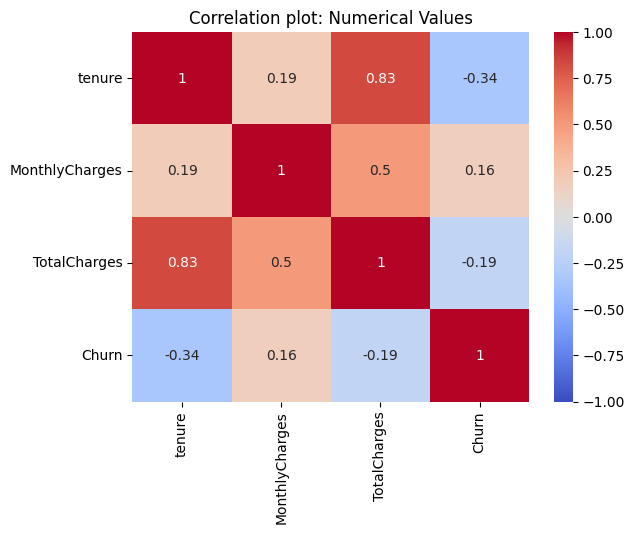

In [52]:
sns.heatmap(pd.concat([df_num, df_bin_dummy['Churn']], axis=1).corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation plot: Numerical Values');

In [41]:
stats.pointbiserialr(df_num['MonthlyCharges'], df_bin_dummy['Churn'])

PointbiserialrResult(correlation=0.16408476431941585, pvalue=8.320819950760903e-27)

In [43]:
stats.pointbiserialr(df_num['TotalCharges'].fillna(0), df_bin_dummy['Churn'])

PointbiserialrResult(correlation=-0.18893032103707152, pvalue=3.822935452095479e-35)

In [47]:
stats.pointbiserialr(df_num['tenure'].fillna(0), df_bin_dummy['Churn'])

PointbiserialrResult(correlation=-0.3409737844158773, pvalue=3.6824909713678887e-115)

In [48]:
np.corrcoef(df_num['tenure'].fillna(0), df_bin_dummy['Churn'])

array([[ 1.        , -0.34097378],
       [-0.34097378,  1.        ]])

In [49]:
np.corrcoef(df_num['TotalCharges'].fillna(0), df_bin_dummy['Churn'])

array([[ 1.        , -0.18893032],
       [-0.18893032,  1.        ]])

In [50]:
np.corrcoef(df_num['MonthlyCharges'].fillna(0), df_bin_dummy['Churn'])

array([[1.        , 0.16408476],
       [0.16408476, 1.        ]])